## An analysis of Reddit comments about HBO’s Euphoria to understand viewers’ experiences and reactions
### Analysis based on posts and comments on the `r/euphoria` subreddit  

#### 3.a Topic Modeling with `BERTopic`

*input*: corpus, embedding model  
*output*: topics, visualization

*tools*:  
`BERTopic`

*about*:  
`BERTopic` is a topic modeling technique that leverages BERT embeddings and a class-based TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.


In [1]:
# %pip install bertopic
# %pip install bertopic[visualization]
# no matches found for bertopic visualization

In [1]:
import pandas as pd
import numpy as np
# going to try modeling with raw comments and cleaned comments
# data_raw = pd.read_pickle('../dat/s2_rue_comments.pkl')
# data_raw = list(data_raw[0])
data_clean = pd.read_pickle('../dat/corpus_s1.pkl')
# data_clean = list(data_clean[0])

In [2]:
from bertopic import BERTopic

Modeling with raw data wasn't ideal. Spam ended up becoming topics.  

---
**Modeling with clean data**

In [3]:
# need to set environment variable to disable token parallelization
# see issue https://github.com/huggingface/transformers/issues/5486
TOKENIZERS_PARALLELISM = False

In [4]:
data_clean2 = data_clean.dropna()

In [6]:
# model = BERTopic(calculate_probabilities=True, nr_topics=20)
# topics, probabilities= model.fit_transform(list(data_clean2[0]))

---

**USING K-MEANS TO DETERMINE CLUSTERS**

In [22]:
import spacy
nlp = spacy.load('en_core_web_sm')
sw_spacy = nlp.Defaults.stop_words | {'rt', 'via', '…'}
add_stopwords = ['i', 'just','did', 'ab', 'amp', 'ml', 'xb','abc', 'abcb', 'abcny', 'abd', 'abdabca', 'fs', 
                  'zpqxhxhzanapjsjbf', 'zqcsrpwsge', 'zqnuhckwdqwrhkuo', 'zs', 'zshwbhethehenozxfyqg',
                  'zsmkbrmwngzsibrntkt', 'zy', 'zwhnrmujykdxmntiub', 'afqjcnguytghbsuvixmglpwzqbg', 'ebecadcbdfcbafbdb',
                  'abfbmltmqspf', 'abfafebfbad', 'episode', 'season', 's', 'lol',  'like', 'think', 'mil']
 
# using spacy stopwords instead of sklearn
stop_words = sw_spacy.union(add_stopwords)

In [23]:
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
# using tfidf vectorizer instead of count vectorizer as per SHADI SUGGESTION 10/24/22
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.decomposition import NMF
# from sklearn.decomposition import TruncatedSVD
# from sklearn.decomposition import PCA
# from sklearn.decomposition import FastICA
# from sklearn.decomposition import FactorAnalysis
# from sklearn.decomposition import SparsePCA
# from sklearn.decomposition import MiniBatchSparsePCA
# from sklearn.decomposition import MiniBatchDictionaryLearning
# from sklearn.decomposition import DictionaryLearning
# from sklearn.decomposition import KernelPCA
# from sklearn.decomposition import IncrementalPCA


In [ ]:


# vectorizer_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
vectorizer_model = TfidfVectorizer(stop_words=stop_words, max_df=0.95, min_df=2, ngram_range=(1,2))

# KMEANS
from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters=10)
model = BERTopic(hdbscan_model=cluster_model,verbose=True,diversity=1,top_n_words=10, 
                       embedding_model="all-mpnet-base-v2", nr_topics=10,
                       vectorizer_model=vectorizer_model,calculate_probabilities=True)
topics, probabilities = model.fit_transform(list(data_clean2[0]))

In [7]:
model.get_topic_freq().head()

,Topic,Count
0,7,574
1,0,552
2,2,498
3,1,383
4,5,359


In [8]:
model.get_topic(0)

[('series finale', 0.016544052189138545),
 ('west', 0.01631988404041964),
 ('open end', 0.016305800570621164),
 ('skin', 0.016166745699246088),
 ('euphoria', 0.015387252208732792),
 ('hear', 0.013466242185847452),
 ('cinematography', 0.012940141377846416),
 ('lyric', 0.011428189411185825),
 ('fez', 0.010030194462341047),
 ('look forward', 0.00997584112143367)]

In [9]:
model.get_topics()

{0: [('series finale', 0.016544052189138545),
  ('west', 0.01631988404041964),
  ('open end', 0.016305800570621164),
  ('skin', 0.016166745699246088),
  ('euphoria', 0.015387252208732792),
  ('hear', 0.013466242185847452),
  ('cinematography', 0.012940141377846416),
  ('lyric', 0.011428189411185825),
  ('fez', 0.010030194462341047),
  ('look forward', 0.00997584112143367)],
 1: [('romeo juliet', 0.018035851156670186),
  ('nate', 0.016943072356158984),
  ('ali', 0.011527467332943802),
  ('kis', 0.009264364187833062),
  ('issue', 0.009073721264878095),
  ('met', 0.008980143425222383),
  ('jule need', 0.008698215747298033),
  ('tell rue', 0.008689731863460327),
  ('new', 0.008068154703139286),
  ('scorpio', 0.008030516715987479)],
 2: [('student', 0.023723577899775562),
  ('lmao', 0.023127378055356324),
  ('remember', 0.017737828463751732),
  ('intj', 0.01374202463308297),
  ('apology', 0.013734528232434233),
  ('destruction', 0.013673379069110134),
  ('thank share', 0.013673379069110134)

In [10]:
# save model
model.save("../models/bertopic_tfidf_s1")

In [12]:
# load model
# model_clean = BERTopic.load('../models/bertopic_s1')

**Visualization**

In [10]:
model.visualize_topics()

In [11]:
model.visualize_heatmap(top_n_topics=10)

In [12]:
from umap import UMAP

sentence_model = SentenceTransformer("all-mpnet-base-v2")
embeddings = sentence_model.encode(list(data_clean2[0]), show_progress_bar=True)

reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
model.visualize_documents(list(data_clean2[0]), reduced_embeddings=reduced_embeddings)

Batches: 100%|██████████| 115/115 [02:21<00:00,  1.23s/it]


In [13]:
# save plotly visualization as html file
s1_doc_plot = model.visualize_documents(list(data_clean2[0]), reduced_embeddings=reduced_embeddings)  
s1_doc_plot.write_html("../plots/s1_doc_plot2.html")

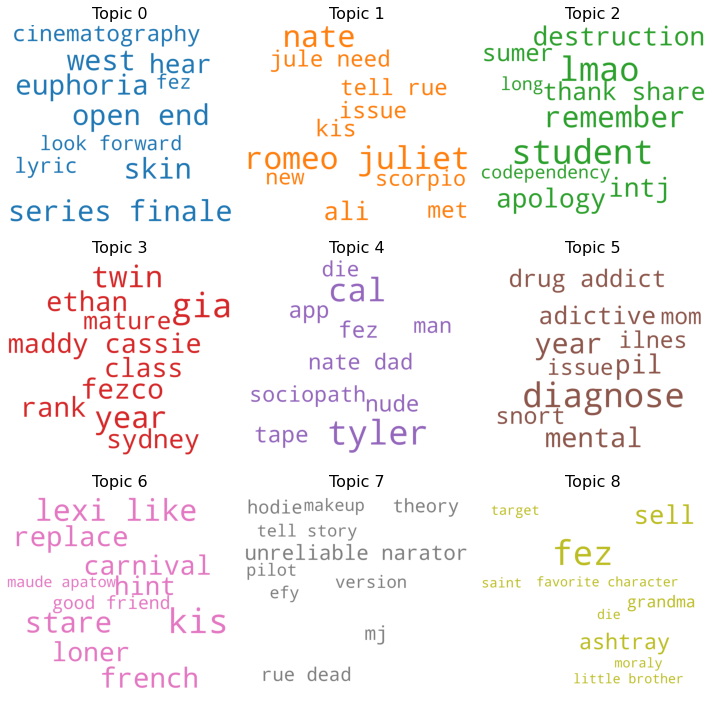

In [16]:
# Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

clouds = WordCloud(stopwords=stop_words,
                   background_color='white',
                   width=2000,
                   height=1800,
                   max_words=10,
                   colormap='tab10',
                   color_func=lambda *args, **kwargs: cols[i],
                   prefer_horizontal=1.0)

topics = model.get_topics()

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i])
    cloud = clouds.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# # save as image just in case
# # import kaleido
# %pip install kaleido
# s1_doc_plot.write_image("../plots/s1_doc_plot.png")

**Topic Reduction**

this model a few topics that are overlapping

In [14]:
# topic reduction after training
new_topics, new_probs = model.reduce_topics(list(data_clean2[0]), topics, probabilities, nr_topics=8)

2022-10-25 14:02:56,794 - BERTopic - Reduced number of topics from 10 to 8


In [15]:
model.get_topic_info()

,Topic,Count,Name
0,0,572,0_cal_maddy_character_ashtray
1,1,568,1_unreliable narator_theory_rue dead_version
2,2,549,2_skin_west_open end_hear
3,3,505,3_student_lmao_codependency_intj
4,4,417,4_nate_leave_fault_tell rue
5,5,388,5_mckay_character_age_freshman
6,6,360,6_diagnose_mental_pil_louis
7,7,296,7_identify_atract_romantic_lie


In [16]:
model.visualize_barchart(top_n_topics=8)

---

#### Sentiment analysis of topics

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [18]:
def sentiment_scores(sentence):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    # print("Overall sentiment dictionary is : ", sentiment_dict)
    # print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    # print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    # print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    # print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    # if sentiment_dict['compound'] >= 0.05 :
    #     x = "Positive"
    # elif sentiment_dict['compound'] <= - 0.05 :
    #     x = "Negative"
    # else :
    #     x = "Neutral"
    return sentiment_dict['compound']


In [19]:
# group data by topic and apply sentiment analysis
data_clean2['topic'] = topics

In [20]:
# group comments by topic
data_clean2['senti'] = data_clean2[0].apply(sentiment_scores)

<AxesSubplot:>

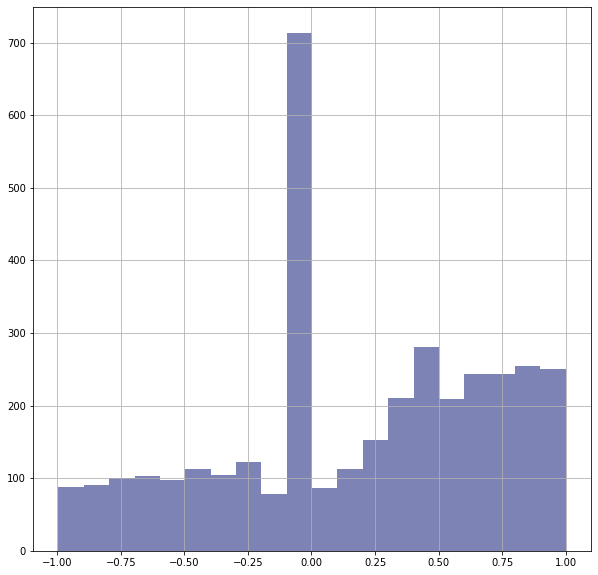

In [21]:
# plot distribution of sentiment scores
import matplotlib as plt

data_clean2['senti'].hist(bins=20, figsize=(10,10), color='#5C64A2',
                            linewidth=0, alpha=0.8)


In [22]:
# compute average senti score per topic
sent_per_topic = data_clean2.groupby('topic').mean()

In [23]:
# get overall sentiment
def get_general_sentiment(senti_score):
    if senti_score >= 0.05 :
        x = "Positive"
    elif senti_score <= - 0.05 :
        x = "Negative"
    else :
        x = "Neutral"
    return x

sent_per_topic['sentiment'] = sent_per_topic['senti'].apply(get_general_sentiment)

In [24]:
print(sent_per_topic['sentiment'].value_counts())

Positive    9
Neutral     1
Name: sentiment, dtype: int64


---

Try topic modeling on posts that only contain drug references

In [24]:
# filter corpus to just posts that contain a drug

drug_terms = ['drug', 'pain killers', 'weed', 'pot', 'marijuana', 'opioids', 'meth', 'xanax', 'molly', 'addiction', 'abuse', 'addict', 'adderall', 'inject', 'high']

drug_posts = data_clean2[data_clean2[0].str.contains('|'.join(drug_terms))]

In [25]:
# vectorizer_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
vectorizer_model_drug = TfidfVectorizer(stop_words=stop_words, max_df=0.95, min_df=2, ngram_range=(1,2))

# KMEANS
from sklearn.cluster import KMeans
cluster_model_drug = KMeans(n_clusters=25)
model_drug = BERTopic(hdbscan_model=cluster_model_drug,verbose=True,diversity=1,top_n_words=10, 
                       embedding_model= "all-MiniLM-L6-v2", nr_topics=25,
                       vectorizer_model=vectorizer_model_drug,calculate_probabilities=True)
drug_topics, drug_probabilities = model_drug.fit_transform(list(drug_posts[0]))

Batches: 100%|██████████| 24/24 [00:10<00:00,  2.24it/s]
2022-11-06 21:54:33,941 - BERTopic - Transformed documents to Embeddings
2022-11-06 21:54:36,974 - BERTopic - Reduced dimensionality
2022-11-06 21:54:37,121 - BERTopic - Clustered reduced embeddings
2022-11-06 21:54:39,117 - BERTopic - Reduced number of topics from 25 to 25


In [26]:
# see topics

model_drug.get_topic_info()

,Topic,Count,Name
0,0,23,0_potential_good point_scene trailer_talk actu...
1,1,19,1_drug dealer_tampa_list_pas
2,2,14,2_jule_past tense_break heart_anoying
3,3,36,3_recover addict_boze_urine_creator
4,4,46,4_cal_sexuality_blackmail_tape
5,5,25,5_series finale_tenage_fine_se
6,6,34,6_zendaya_narator_voiceover_performance
7,7,46,7_jule_romantic relationship_quer_rue literally
8,8,30,8_sell drug_teen_love kind_reflect
9,9,46,9_xanax_mouse_wed_halucination


In [27]:
model_drug.visualize_topics()

In [28]:
# reduce topics -auto

new_drug_topics, new_drug_probs = model_drug.reduce_topics(list(drug_posts[0]), drug_topics, drug_probabilities, nr_topics=4)

2022-11-06 21:56:22,339 - BERTopic - Reduced number of topics from 25 to 4


In [29]:
# get new topic info
model_drug.get_topic_info()

,Topic,Count,Name
0,0,250,0_sell drug_pay_bipolar_ashtray
1,1,219,1_cassie_age_enjoy_kis
2,2,174,2_kill nate_pic_romeo juliet_stand
3,3,103,3_romantic relationship_healthy_addiction jule...


In [30]:
# visualize new topics

model_drug.visualize_barchart()

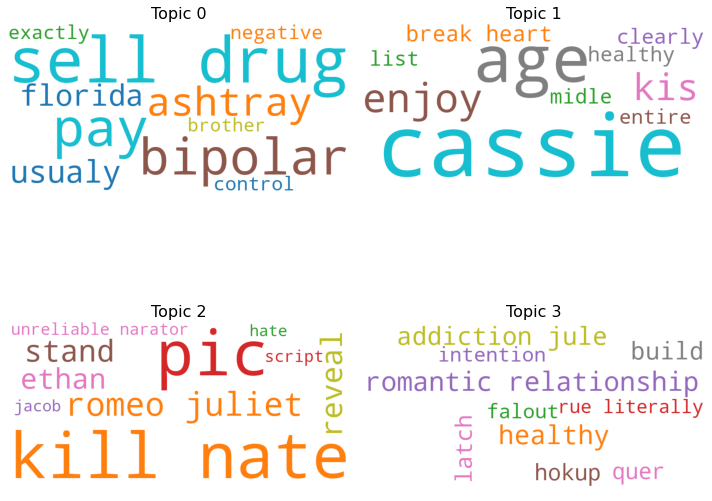

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# get topics
topics = model_drug.get_topics()

# create wordclouds
clouds = WordCloud(background_color="white", max_words=10, 
contour_width=3, contour_color='steelblue',
colormap='tab10', width=800, height=400)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i])
    cloud = clouds.generate_from_frequencies(topic_words, max_font_size=200)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

NOPE

---

In [ ]:
# topic representation - BIGRAMS
# model.update_topics(list(data_clean2[0]), topics, n_gram_range=(1, 3))

In [ ]:
# get new topic representation
# model.get_topic_freq().head()

In [ ]:
# model.get_topic(0)

Use a custom CountVectorizer instead:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 3), stop_words="english")
model.update_topics(list(data_clean2[0]), topics, vectorizer_model=cv)

In [ ]:
model.get_topic_freq().head()

In [ ]:
model.get_topic(0)

Try using the 'auto' option for number of topics:

In [ ]:
# automatically reduce topics
# model_auto = BERTopic(calculate_probabilities=True, nr_topics='auto')
# topics_auto, probabilities_auto = model_auto.fit_transform(list(data_clean2[0]))

In [ ]:
# model_auto.get_topic_freq().head()

In [ ]:
# model_auto.get_topic(2)

In [ ]:
# visualize topics
# model_auto.visualize_distribution(probabilities_auto[0])
# bad probabilites

---

**model with raw data**

In [ ]:
# need to set environment variable to disable token parallelization
# see issue https://github.com/huggingface/transformers/issues/5486
# TOKENIZERS_PARALLELISM = True

In [ ]:
# according to fitting error, there is a NaN in the data
# sequence item 57: expected str instance, float found

import numpy as np
# data_raw2 = data_raw.dropna()

In [ ]:
# model = BERTopic(nr_topics=30)
# topics, probabilities = model.fit_transform(list(data_raw2[0]))

In [ ]:
# model.get_topic_freq().head()

-1 refers to all outliers which do not have a topic assigned. Forcing documents in a topic could lead to poor performance. Thus, we ignore Topic -1

In [ ]:
# lets look at topic 0

# model.get_topic(0)

In [ ]:
# save model
# model.save('../models/bertopic_model_raw')

a lot of stop words included so will repeat with clean data (ABOVE)